In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import os

In [ ]:
pip install sklearn

In [ ]:
pip install seaborn

In [16]:
df = pd.read_csv(r"factbook123.csv")

df

,Country,Area,Birth rate,Current account balance,Death rate,Electricity consumption,Electricity production,Exports,GDP,GDP per capita,...,Life expectancy at birth,Military expenditures,Natural gas consumption,Oil consumption,Population,Public debt,Railways,Reserves of foreign exchange & gold,Total fertility rate,Unemployment rate
0,Japan,"377,835",9.47,"$170,200,000,000.00",8.95,"971,000,000,000","1,044,000,000,000.00","$538,800,000,000.00","$3,745,000,000,000.00","$29,400.00",...,81.15,1,"80,420,000,000.00","5,290,000","127,417,244",164.3,23705,"664,600,000,000.00",1.39,4.7
1,Germany,"357,021",8.33,"$73,590,000,000.00",10.55,"519,500,000,000","560,000,000,000.00","$893,300,000,000.00","$2,362,000,000,000.00","$28,700.00",...,78.65,1.5,"99,550,000,000.00","2,891,000","82,431,390",65.8,46039,"96,840,000,000.00",1.39,10.6
2,Saudi Arabia,"1,960,582",29.56,"$51,500,000,000.00",2.62,"128,500,000,000","138,200,000,000.00","$113,000,000,000.00","$310,200,000,000.00","$12,000.00",...,75.46,10,"56,400,000,000.00","1,550,000","26,417,599",75,1392,"23,620,000,000.00",4.05,25
3,Russia,"17,075,200",9.80,"$46,040,000,000.00",14.52,"894,300,000,000","915,000,000,000.00","$162,500,000,000.00","$1,408,000,000,000.00","$9,800.00",...,67.10,,"405,800,000,000.00","2,310,000","143,420,309",28.2,87157,"124,500,000,000.00",1.27,8.3
4,Switzerland,"41,290",9.77,"$40,950,000,000.00",8.48,"54,530,000,000","63,470,000,000.00","$130,700,000,000.00","$251,900,000,000.00","$33,800.00",...,80.39,1,"3,093,000,000.00","290,400","7,489,370",57.2,4533,"69,580,000,000.00",1.42,3.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,Italy,"301,230",8.89,"($21,100,000,000.00)",10.30,"293,900,000,000","261,600,000,000.00","$336,400,000,000.00","$1,609,000,000,000.00","$27,700.00",...,79.68,1.8,"71,180,000,000.00","1,866,000","58,103,033",105.6,19507,"61,500,000,000.00",1.28,8.6
145,Spain,"504,782",10.10,"($30,890,000,000.00)",9.63,"218,400,000,000","229,000,000,000.00","$172,500,000,000.00","$937,600,000,000.00","$23,300.00",...,79.52,1.2,"17,960,000,000.00","1,497,000","40,341,462",53.2,14268,"19,700,000,000.00",1.28,10.4
146,United Kingdom,"244,820",10.78,"($33,460,000,000.00)",10.18,"337,400,000,000","395,900,000,000.00","$347,200,000,000.00","$1,782,000,000,000.00","$29,600.00",...,78.38,2.4,"92,850,000,000.00","1,692,000","60,441,457",39.6,17186,"48,730,000,000.00",1.66,4.8
147,Australia,"7,686,850",12.26,"($38,300,000,000.00)",7.44,"195,600,000,000","210,300,000,000.00","$86,890,000,000.00","$611,700,000,000.00","$30,700.00",...,80.39,2.7,"23,330,000,000.00","796,500","20,090,437",17.4,43802,"35,140,000,000.00",1.76,5.1


In [17]:
df.head()

,Country,Area,Birth rate,Current account balance,Death rate,Electricity consumption,Electricity production,Exports,GDP,GDP per capita,...,Life expectancy at birth,Military expenditures,Natural gas consumption,Oil consumption,Population,Public debt,Railways,Reserves of foreign exchange & gold,Total fertility rate,Unemployment rate
0,Japan,"377,835",9.47,"$170,200,000,000.00",8.95,"971,000,000,000","1,044,000,000,000.00","$538,800,000,000.00","$3,745,000,000,000.00","$29,400.00",...,81.15,1,"80,420,000,000.00","5,290,000","127,417,244",164.3,23705,"664,600,000,000.00",1.39,4.7
1,Germany,"357,021",8.33,"$73,590,000,000.00",10.55,"519,500,000,000","560,000,000,000.00","$893,300,000,000.00","$2,362,000,000,000.00","$28,700.00",...,78.65,1.5,"99,550,000,000.00","2,891,000","82,431,390",65.8,46039,"96,840,000,000.00",1.39,10.6
2,Saudi Arabia,"1,960,582",29.56,"$51,500,000,000.00",2.62,"128,500,000,000","138,200,000,000.00","$113,000,000,000.00","$310,200,000,000.00","$12,000.00",...,75.46,10,"56,400,000,000.00","1,550,000","26,417,599",75,1392,"23,620,000,000.00",4.05,25
3,Russia,"17,075,200",9.80,"$46,040,000,000.00",14.52,"894,300,000,000","915,000,000,000.00","$162,500,000,000.00","$1,408,000,000,000.00","$9,800.00",...,67.10,,"405,800,000,000.00","2,310,000","143,420,309",28.2,87157,"124,500,000,000.00",1.27,8.3
4,Switzerland,"41,290",9.77,"$40,950,000,000.00",8.48,"54,530,000,000","63,470,000,000.00","$130,700,000,000.00","$251,900,000,000.00","$33,800.00",...,80.39,1,"3,093,000,000.00","290,400","7,489,370",57.2,4533,"69,580,000,000.00",1.42,3.4


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [110]:
data_telco = pd.read_csv('TelcoCustomerChurn.csv')

In [109]:
df2 = data_telco.copy()

In [108]:
print(df2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   int64  
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [107]:
df2.isnull()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7039,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7040,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7041,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [106]:
df2.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [105]:
sumnum = df2.describe()

sumnum

,gender,SeniorCitizen,tenure,MonthlyCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.495244,0.162147,32.371149,64.761692,0.265370
std,0.500013,0.368612,24.559481,30.090047,0.441561
min,0.000000,0.000000,0.000000,18.250000,0.000000
25%,0.000000,0.000000,9.000000,35.500000,0.000000
50%,0.000000,0.000000,29.000000,70.350000,0.000000
75%,1.000000,0.000000,55.000000,89.850000,1.000000
max,1.000000,1.000000,72.000000,118.750000,1.000000


In [104]:
sumcate = df2.describe(include='O')

sumcate

,customerID,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531
top,7590-VHVEG,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,
freq,1,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11


In [111]:
df2['PaymentMethod'].value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

In [112]:
df2['Contract'].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

In [113]:
np.unique(df2['PaymentMethod'])

array(['Bank transfer (automatic)', 'Credit card (automatic)',
       'Electronic check', 'Mailed check'], dtype=object)

In [115]:
correlation = df2.corr()

correlation

C:\Users\Hazim\AppData\Local\Temp\ipykernel_17112\2288925638.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df2.corr()


,SeniorCitizen,tenure,MonthlyCharges
SeniorCitizen,1.000000,0.016567,0.220173
tenure,0.016567,1.000000,0.247900
MonthlyCharges,0.220173,0.247900,1.000000


In [116]:
df2.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [94]:
# Mengganti nilai "Yes" dan "No" menjadi 1 dan 0 
# df2['Churn'].replace({'Yes': 1, 'No': 0}, inplace=True)

# Menampilkan 5 baris teratas 
# print(df2.head())

In [95]:
# Mengganti nilai "Female" dan "Male" menjadi 1 dan 0 
#df2['gender'].replace({'Female': 1, 'Male': 0}, inplace=True)

# Menampilkan 5 baris teratas 
# print(df2.head())

In [123]:
gender = pd.crosstab(index = df2['Contract'],
                    columns = 'count',
                     normalize=True
                    )

gender

col_0,count
Contract,
Month-to-month,0.550192
One year,0.209144
Two year,0.240664


In [127]:
contract_churn = pd.crosstab(index= df2['Contract'],
                            columns = df['Churn'],
                             margins = True,
                             normalize = 'index'
                            )

contract_churn

Churn,0,1
Contract,,
Month-to-month,0.572903,0.427097
One year,0.887305,0.112695
Two year,0.971681,0.028319
All,0.734630,0.265370


#### frequency distribution of contract

<Axes: xlabel='Churn', ylabel='count'>

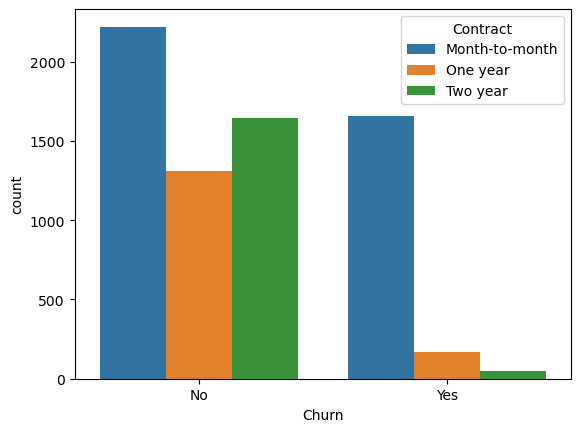

In [125]:

df_gc = df2[['Contract', 'Churn']]

sns.countplot(x='Churn', hue='Contract', data=df_gc)

C:\Users\Hazim\AppData\Local\Temp\ipykernel_17112\1064718999.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2['MonthlyCharges'], bins=5, kde=False)


<Axes: xlabel='MonthlyCharges'>

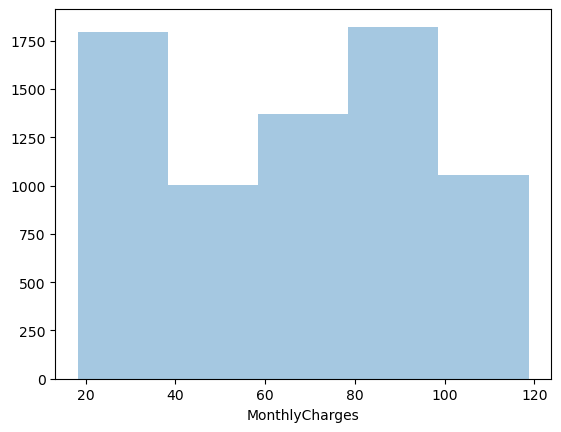

In [132]:
sns.distplot(df2['MonthlyCharges'], bins=5, kde=False)

C:\Users\Hazim\AppData\Local\Temp\ipykernel_17112\4123537728.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2['tenure'], bins=10, kde=False)


<Axes: xlabel='tenure'>

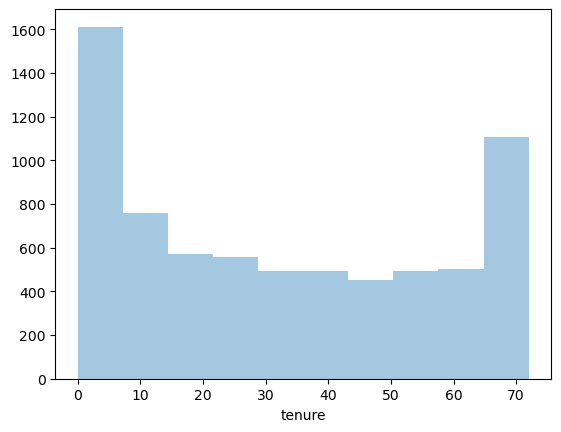

In [134]:
sns.distplot(df2['tenure'], bins=10, kde=False)

<Axes: xlabel='gender', ylabel='count'>

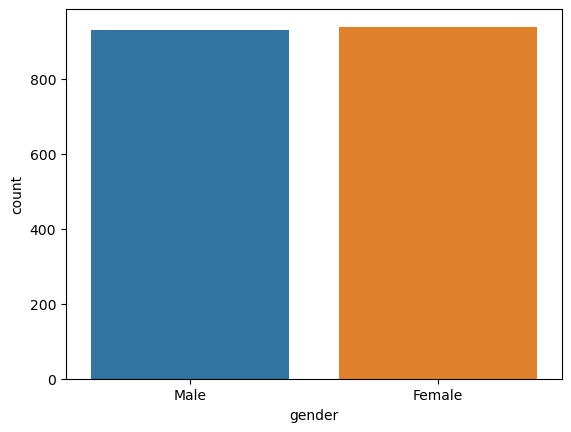

In [120]:
# Memilih kolom "gender" dan "Churn" dari dataset
df_gc = df2[['gender', 'Churn']]

# Filter dataset hanya untuk pelanggan churn
df_churn = df_gc[df_gc['Churn'] == 'Yes']

# Memplot jumlah pelanggan churn dan not churn berdasarkan jenis kelamin
sns.countplot(x='gender', data=df_churn)

### Bivariate analysis for 

In [143]:
sns.boxplot('Churn', 'Contract')
df2.groupby('Churn')['Contract'].median()

TypeError: boxplot() takes from 0 to 1 positional arguments but 2 were given